<a href="https://colab.research.google.com/github/alzimna/Portfolio/blob/main/One%20Way%20Manova/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Overview**

Inflasi merupakan suatu hal yang tidak dapat dihindari oleh pelaku ekonomi. Salah satu cara untuk melawan arus inflasi adalah dengan investasi. Pemilihan instrumen yang tepat oleh investor diharapkan dapat memberikan *return* yang mengalahkan laju inflasi.

Saham merupakan instrumen investasi yang populer diperbincangkan di masyarakat. Investor dapat memilih hendak membeli saham di bidang (sektor) perbankan, tambang, industri, dan lain-lain. Di Indonesia sendiri terdapat 11 sektor saham yang tercatat di BEI. Seperti sebuah toko, kesebelas sektor ini mempunyai *value* yang berbeda. Investor akan memilih saham yang berada di sektor yang mempunyai *value* lebih daripada sektor lain.

Dikutip dari situs https://snips.stockbit.com/investasi/rasio-keuangan-ini-dalam-analisis-fundamental-saham ada beberapa rasio keuangan yang dapat digunakan oleh investor untuk menentukan saham mana yang harus dibeli, beberapa diantaranya adalah


*  Price To Earning Ratio (PER). Rasio ini merupakan cara membandingkan harga saham terhadap laba perusahaan. Semakin kecil nilai PER maka semakin murah pula harga saham perusahaan tersebut.

* Price To Book Value (PBV). Rasio harga saham terhadap nilai buku perusahaan. PBV $> 1$ artinya saham itu mahal, dan PBV $<1$ berarti saham itu murah. Namun kenyataannya rata-rata perusahaan yang baik itu PBV nya sudah hampir pasti menyentuh di atas dari 1.

* Debt To Equity Ratio (DER). Perbandingan antara hutang dengan modal perusahaan. Skemanya bila DER $< 100\%$ maka utang lebih kecil dari pada modal. Lalu bila DER $> 100\%$ maka utang lebih besar dari pada modal.

Selanjutnya menggunakan one way MANOVA akan dibandingkan rata-rata ketiga nilai ini pada empat sektor yaitu Financial, Basic Material, Industrial, dan Energy. Data yang digunakan adalah data pada bulan September 2023 yang diambil dari link : https://www.idx.co.id/id/data-pasar/laporan-statistik/statistik/.

Diambil 12 saham yang mewakili keempat sektor yang dipilih dengan mengambil 12 saham dengan ekuitas tertinggi tiap sektor. Ekuitas perusahaan sendiri merupakan selisih antara aset dan kewajiban yang ada. Diperoleh data sebagai berikut

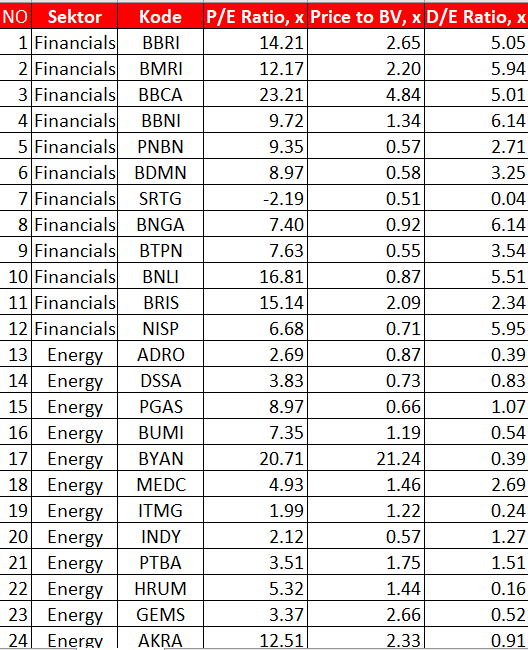

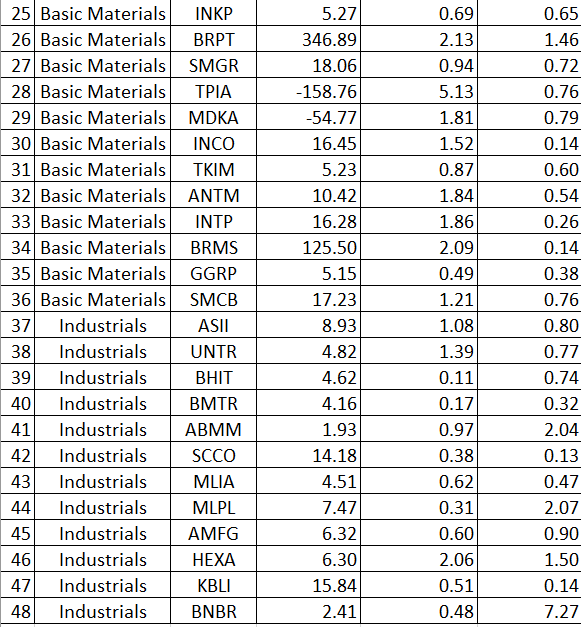

# **Project Method**
Metode yang digunakan pada projek ini adalah materi Bab 6 pada buku "*Methods of Multivariate Analysis*", Oleh  ALVIN C. RENCHER yaitu menggunakan one way MANOVA. Dari 4 sektor diambil 12 perusahaan yang akan diobservasi dan dicari rata-rata tiap variabelnya. Selanjutnya dengan menggunakan one way MANOVA akan diuji apakah terdapat perbedaan yang signifikan pada suatu sektor. Pada projek ini digunakan bahasa pemrograman R.

# **Code Snippet**

In [1]:
install.packages('matlib')
library("matlib")
library(httr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘rgl’, ‘car’




In [2]:
github_link <- "https://github.com/alzimna/Portfolio/raw/refs/heads/main/One%20Way%20Manova/coba2.xlsx"
temp_file <- tempfile(fileext = ".xlsx")
req <- GET(github_link,
          # authenticate using GITHUB_PAT
           authenticate(Sys.getenv("GITHUB_PAT"), ""),
          # write result to disk
           write_disk(path = temp_file))
data = readxl::read_excel(temp_file)
Y = as.matrix(data[,4:6])
Y

"P/E Ratio, x","Price to BV, x","D/E Ratio, x"
14.21,2.65,5.05
12.17,2.20,5.94
23.21,4.84,5.01
9.72,1.34,6.14
9.35,0.57,2.71
8.97,0.58,3.25
-2.19,0.51,0.04
7.40,0.92,6.14
7.63,0.55,3.54
16.81,0.87,5.51


Akan dicari matriks $H$ dan $E$ sesuai persamaan (6.9) dan (6.10) berikut
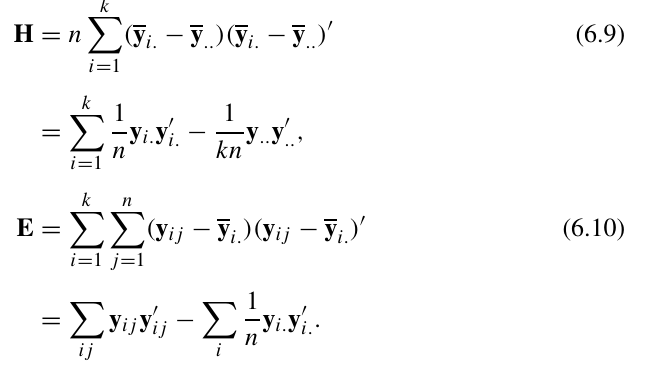

In [7]:
n = 12
p = dim(Y)[2]
k = dim(Y)[1]/n

H = matrix(rep(0,(p*p)),p,p)

ybar.. = rep(0,p)
for (i in 1:p){
  ybar..[i] = sum(Y[,i])/(k*n)
}

for (i in 1:k){
  ybar. = rep(0,p)
  for (j in ((i-1)*n+1):(i*n)){
    ybar. = ybar. + Y[j,]/n
  }
  temp = ybar.-ybar..
  H = H+temp %*% t(temp)
}
H = n*H
cat("H = \n")
print(H)

E  = matrix(rep(0,(p*p)),p,p)
for (i in 1:k){
  ybar. = rep(0,p)
  for (j in ((i-1)*n+1):(i*n)){
    ybar. = ybar. + Y[j,]
  }
  ybar. = ybar./n

  temp = rep(0,p)
  for (j in ((i-1)*n+1):(i*n)){
    x = Y[j,]-ybar.
    temp = temp+x %*% t(x)
  }
  E = E+temp
}
cat("E = \n")
print(E)

H = 
     P/E Ratio, x Price to BV, x D/E Ratio, x
[1,]   4265.62052      -22.17507   -203.36928
[2,]    -22.17507       32.53884    -16.81694
[3,]   -203.36928      -16.81694    104.26061
E = 
     P/E Ratio, x Price to BV, x D/E Ratio, x
[1,] 156225.67925     -38.565567   205.636008
[2,]    -38.56557     405.134658    -1.941183
[3,]    205.63601      -1.941183    89.853325


Akan dilakukan uji hipotesis dengan
$$
H_0 : \pmb{\mu}_1 = \pmb{\mu}_2 =  \pmb{\mu}_3 = \pmb{\mu}_4
$$

1. Wilks' Statistics

Dengan menggunakan Wilks' $\Lambda$ pernyataan $H_0$ ditolak jika $\Lambda \leq \Lambda_{\alpha,p,v_H,v_E}$.

Dari persamaan (6.13) diperoleh
$
    \Lambda = \frac{|E|}{|E+H|} = 0.4175318
$
    
Dengan menggunakan $\alpha = 0.05, p=3, v_H = k-1 = 4-1 = 3,v_E = k(n-1) = 44$ pada tabel A9 diperoleh $\Lambda_{0.05,3,3,40} = 0.651$. Karena $\Lambda<\Lambda_{0.05,3,3,40}$ maka $H_0$ ditolak.

In [9]:
#Wilks test
W = det(E)/(det(E+H))
cat("W = ",W)

W =  0.4175318

2. Pillai's Statistics

Pernyataan $H_0$ akan ditolak jika $V^{(s)} \geq V_\alpha^{(s)}$. Nilai eigen dari $\mathbf{E}^{-1}\mathbf{H}$ adalah $1.17795971, 0.07429709,$ dan $0.02361178$. Sehingga diperoleh Pillai’s statistic
$$
    V^{(s)} = \sum_{i=1}^{3} \frac{\lambda_i}{1+\lambda_i} = 0.6330806
$$

Untuk mencari nilai kritis dari $V^{(s)}$ dipandang
    \begin{align*}
        s &= \text{min}(v_H,p) = \text{min}(3,3)  = 3\\
        N &= \frac{1}{2}(v_E-p-1) = \frac{1}{2}(44-4-1) = 19.5\\
        m &= \frac{1}{2}(|v_H-p|-1) = \frac{1}{2}(|3-3|-1) = 0
    \end{align*}
sehingga dari tabel A11 diperoleh $V_{0.05}^{(s)} = 0.42$. Karena $0.633>0.42$ maka $H_0$ ditolak.

In [12]:
#Pillai test
e = eigen(inv(E) %*% H)$values
V = 0
for (i in 1:p){
  V = V+e[i]/(1+e[i])
}
cat("V = ",V)

V =  0.6330806

3. Lawley–Hotelling test

Pernyataan $H_0$ akan ditolak jika $\frac{v_E}{v_H}U^{(s)} \geq \frac{v_E}{v_H}U_\alpha^{(s)}$. Dari (6.28) diperoleh
$$
    U^{(s)} = \sum_{i=1}^3 \lambda_i =  1.275869
$$
    sehingga diperoleh nilai uji statistik
$$
    \frac{v_E}{v_H}U^{(s)} = \frac{44}{3}(1.275869) = 18.71274
$$

Dari tabel A.12 diperoleh nilai kritis dengan tingkat signifikansi $\alpha = 0.05$ dari $\frac{v_E}{v_H}U^{(s)}$ adalah $6.1621$. Karena $24.539 > 6.1621$ maka $H_0$ ditolak.

In [15]:
#Lawley-Hotelling test
U = sum(e)
cat("U = ",U,"\n")
stat = 44/3*U
cat("stat = ",stat)

U =  1.275869 
stat =  18.71274

4. Roy's Test

Pernyataan $H_0$ akan ditolak jika $\theta \geq \theta_{\alpha,s,m,N}$. Dari (6.20) diperoleh
    \begin{align*}
    \theta = \frac{\lambda_1}{1+\lambda_1} = \frac{1.17796}{1+1.17796} = 0.5408547
    \end{align*}

Dari tabel A.10 diperoleh nilai kritis $\theta_{0.05,3,0,19.5} = 0.293$. Karena $0.5408547 > 0.293$ maka $H_0$ ditolak.

In [18]:
#Roy test
a = max(e)
theta = a/(1+a)
cat("theta = ",theta)

theta =  0.5408547

Dari keempat uji, dapat ditarik kesimpulan bahwa **terdapat minimal dua sektor yang mempunyai rata-rata pada satu variabel yang berbeda secara signifikan.** Berikut ini diberikan perhitungan nilai-nilai yang diperoleh diatas menggunakan packages dari R.

In [19]:
df = data[,c(2,4:6)]
colnames(df) = c("Sektor","P/E","PBV","D/E")
df$Sektor <- as.factor(df$Sektor)
dependent_vars <- as.matrix(df[,2:4])
independent_var <- as.matrix(df[,1])

manova_model <- manova(dependent_vars ~ independent_var, data = df)
summary(manova_model,test = c('Wilks'))
summary(manova_model,test = c('Pillai'))
summary(manova_model,test = c('Hotelling-Lawley'))
summary(manova_model,test = c('Roy'))

                Df   Wilks approx F num Df den Df    Pr(>F)    
independent_var  3 0.41753   4.9103      9 102.37 1.784e-05 ***
Residuals       44                                             
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                Df  Pillai approx F num Df den Df    Pr(>F)    
independent_var  3 0.63308   3.9229      9    132 0.0001918 ***
Residuals       44                                             
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                Df Hotelling-Lawley approx F num Df den Df    Pr(>F)    
independent_var  3           1.2759    5.765      9    122 1.177e-06 ***
Residuals       44                                                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                Df   Roy approx F num Df den Df    Pr(>F)    
independent_var  3 1.178   17.277      3     44 1.473e-07 ***
Residuals       44                                           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1